In [11]:
# Tensorflow™ Workshop

# Portions of this page are modifications based on work created and shared by Google 
# and used according to terms described in the Creative Commons 3.0 Attribution License.
# 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/mnist/mnist_softmax.py
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.


# Is this an Open Source workshop?  Yes!
# ==============================================================================
# Copyright 2017 Toronto AI. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import tensorflow as tf



In [12]:
# Import the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('.',one_hot=True)

print(mnist)
print("---------------------------------------")
print("  training set: ", mnist.train.images.shape)
print("validation set: ", mnist.validation.images.shape)
print("      test set: ", mnist.test.images.shape)




Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x134a46f60>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x134a469e8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x134a46a20>)
---------------------------------------
  training set:  (55000, 784)
validation set:  (5000, 784)
      test set:  (10000, 784)


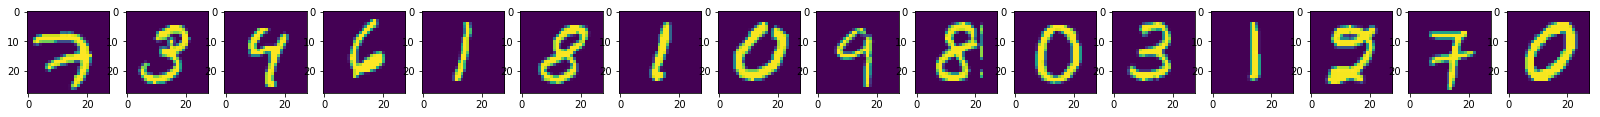

In [13]:
# Visualize some of the training samples
%matplotlib inline
import matplotlib.pyplot as plot
fig = plot.figure(figsize=(28,28)) 
plot.axis('off')
count = 16
for i in range(count):
    fig.add_subplot(plot.subplot(2,count,i+1))
    plot.imshow(mnist.train.images[i].reshape(28,28))
plot.show()


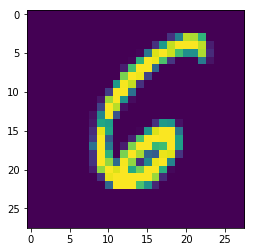

In [14]:
from IPython.display import clear_output
import time
plot.axis('off')

def show_image(plot, ndarray_of_pixels, size=(28,28), cmap='viridis'):
    plot.imshow(ndarray_of_pixels.reshape(*size), cmap=cmap)
    time.sleep(0.1)
    clear_output(True)
    plot.show()

# Let's preview some of the training data
count = 40
for i in range(count):
    show_image(plot, mnist.train.images[i])
plot.close()

In [15]:
import matplotlib



def visualize(images, cmap='viridis'):
    trainedWeights = []
    for i in range(10):
        trainedWeights.append(images[i,:,:])
        plot.subplot(2,5,i+1)
        plot.axis('off')
        plot.imshow(trainedWeights[i], cmap=cmap, interpolation='none')
    


In [16]:
tf.reset_default_graph()         # Allows us to re-run this cell

with tf.name_scope('ai_inputs'):
    # samples_x will hold our training samples
    samples_x  = tf.placeholder(tf.float32, [None, 784], name='samples')

    # labels_y holds the one_hot labels of the handwritten digits in an array
    labels_y  = tf.placeholder(tf.float32, [None, 10], name='labels')


with tf.name_scope('ai_model'):
    # Our model will contain 10 separate interal 'ideas' or 'representations' of what 
    # each digit looks like.  These 'ideas' are represented by 784 weights that are applied 
    # to each input pixel to later score how closely a new handwritten digit compares 
    # with the 'ideal' digit it has learned.  Our model also includes another form of weight called 
    # a 'bias' that will adjust the weighted value by a constant amount, regardless of the input.

    # Both the weights and the biases are learned values that will be learned when the model 
    # is trained againstthe training set.
    weights_w = tf.Variable(tf.zeros([784, 10]), name="weights")
    biases_b  = tf.Variable(tf.zeros([10]), name="biases")

    # Our model is linear y = x*W + b
    # It has 10 cells, representing the 10 output neurons
    # The output is formed by
    model_y   = tf.matmul(samples_x, weights_w) + biases_b


with tf.name_scope('ai_cost_function'):
    cost_function = tf.reduce_mean(
          tf.nn.softmax_cross_entropy_with_logits(labels=labels_y, logits=model_y))


with tf.name_scope('ai_optimizer'):
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
    # outputs of 'y', and then average across the batch.
    train_step = tf.train.GradientDescentOptimizer(.1).minimize(cost_function)

with tf.name_scope('ai_visualization'):
    # This tensor will be used to display the weights as an image on screen.
    reshapedWeights = tf.reshape(tf.transpose(tf.slice(weights_w, [0,0], [784,10])), [10,28,28])


# Log the model's graph so we can visualize it in TensorBoard
writer = tf.summary.FileWriter('/tmp/torontoai/digit-model', cost_function.graph)
writer.close()



Training complete


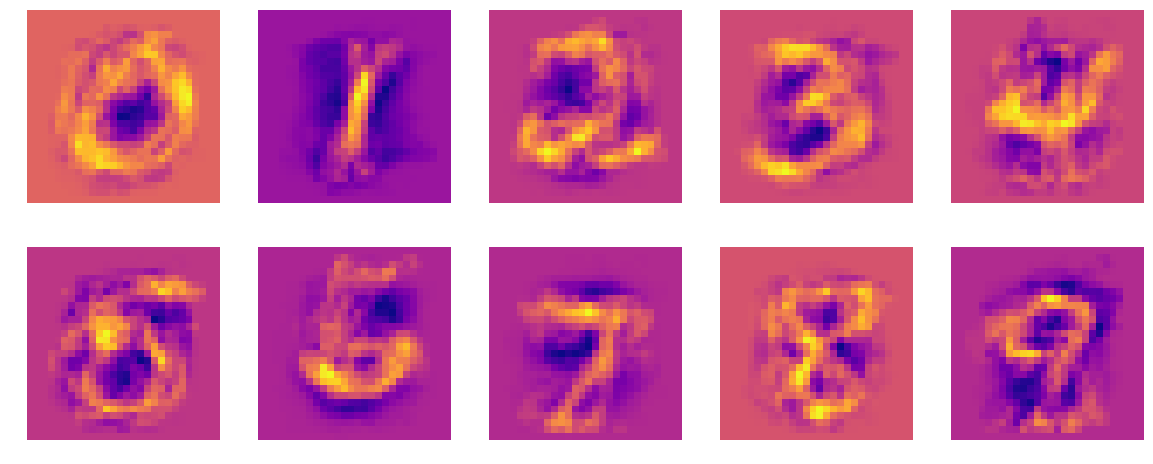

In [18]:

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)

# Train
numRounds = 100  # Try adjusting the number of training rounds.
for i in range(numRounds):
    batch_xs, batch_ys = mnist.train.next_batch(2)    # Try adjusting the batch size.
    results = sess.run([train_step, reshapedWeights], feed_dict={samples_x: batch_xs, labels_y: batch_ys})
    
    # Visualize it!
    x = 1
    if i % x == 0 and (i < 25):
        print(reshapedWeights)
        visualize(results[1], cmap='plasma')
        clear_output(True) if i + x < numRounds else 0
        plot.show()
        plot.close()


clear_output(True)
visualize(results[1], cmap='plasma')
print('Training complete')



In [19]:
# How did the training go?  Let's check the accurracy
correct_prediction = tf.equal(tf.argmax(model_y, 1), tf.argmax(labels_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accurracy: ", sess.run(accuracy, feed_dict={samples_x: mnist.test.images,
                                  labels_y: mnist.test.labels}))


Accurracy:  0.6722


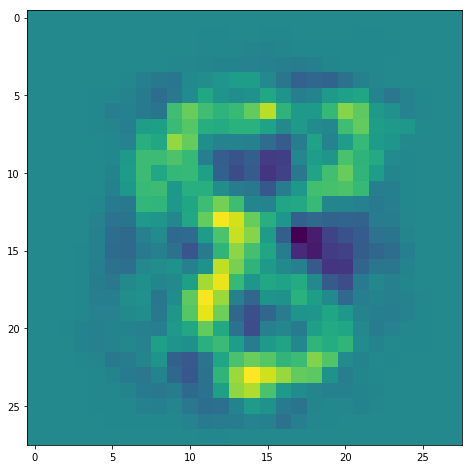

-0.0668473


In [20]:
# Let's take a look at the trained weights for the handwritten digit 8
trainedWeights = tf.transpose(tf.slice(weights_w, [0,8], [784,1])).eval().reshape(28,28)
show_image(plot, trainedWeights, cmap='viridis')

# The trained bias is displayed below the image of the weights
trainedBias = biases_b.eval()[8]
print(trainedBias)



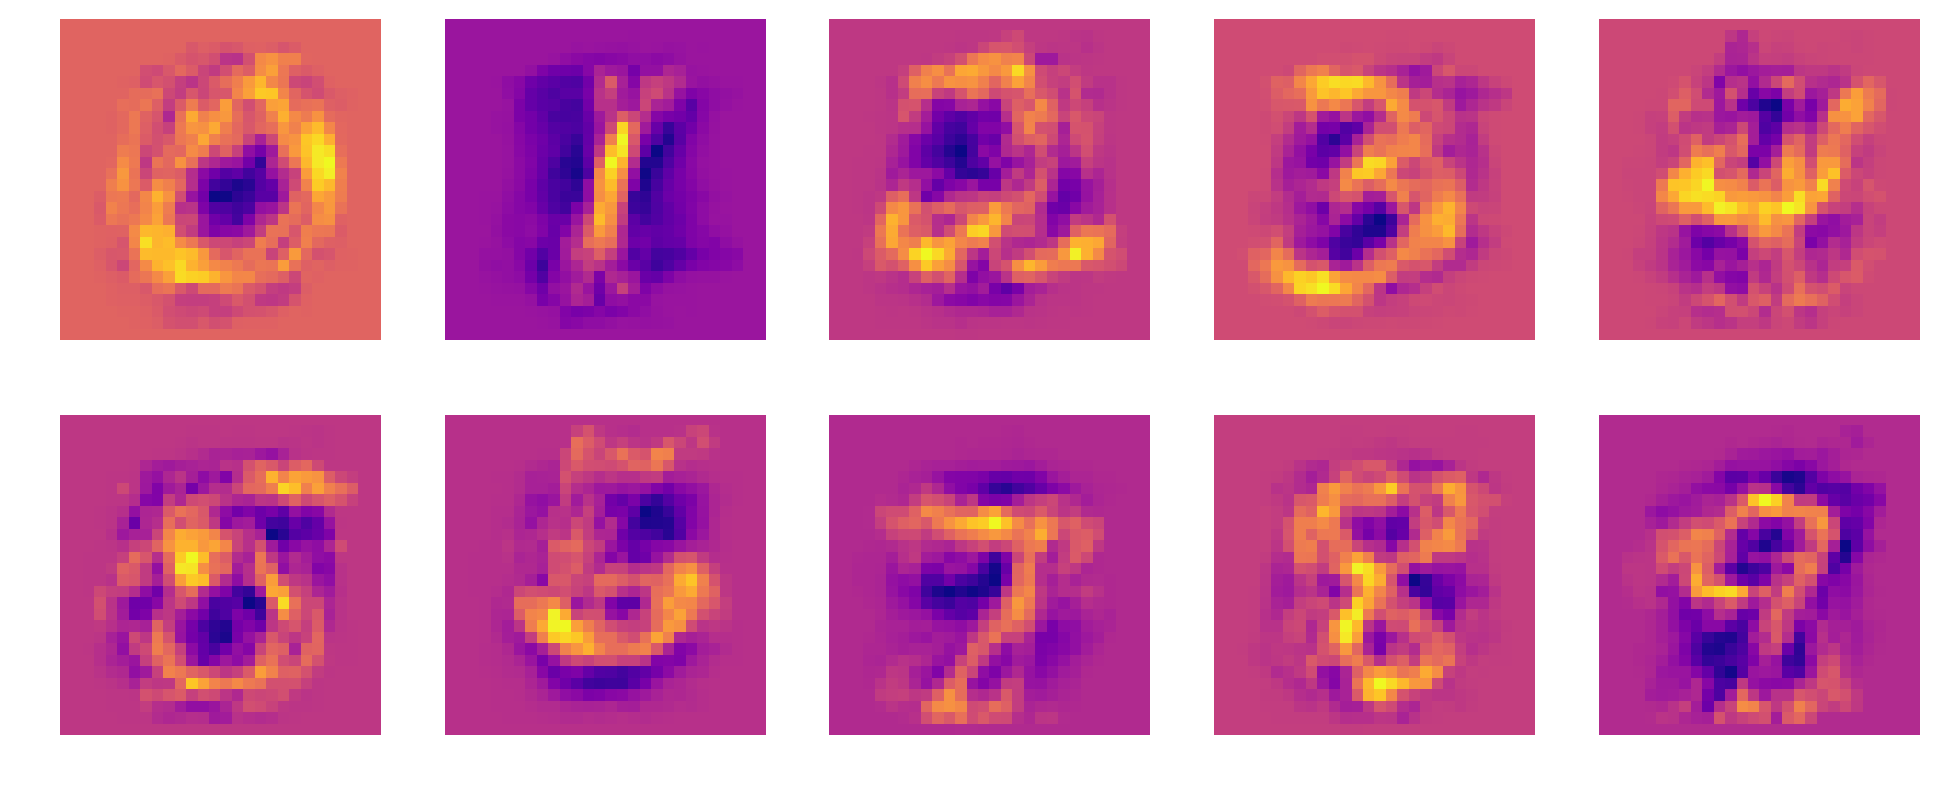

In [21]:
# Okay, now let's visualize all of the trained weights

plot.figure(figsize=(15, 6), dpi=160)
for i in range(10):
    plot.subplot(2,5,i+1)
    plot.axis('off')
    trainedWeights = tf.transpose(tf.slice(weights_w, [0,i], [784,1])).eval().reshape(28,28)
    plot.imshow(trainedWeights, cmap='plasma')



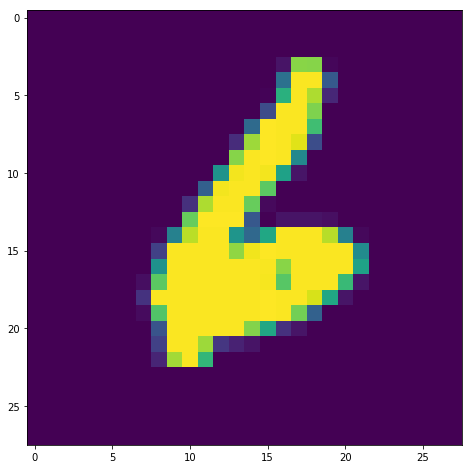

In [22]:
import numpy as np

mnist = input_data.read_data_sets('.',one_hot=True)  #reload
sample = mnist.train.images[485]
weights = tf.slice(weights_w, [0,0], [784,10]).eval().transpose()
costs = np.add(np.matmul(weights,sample), biases_b.eval())
show_image(plot, sample)


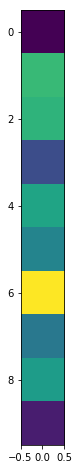

[-3.75047469  1.7149744   1.50903666 -1.8432672   0.98102766 -0.09664864
  4.34313297 -0.49525875  0.72573102 -3.08825231]


In [23]:
# Show the evidence gathered through the model for each possible digit 0-9
show_image(plot, costs, size=(10,1))
print(costs)


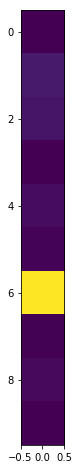

In [24]:
# Let's apply softmax to turn the evidence into a probability distribution
# In softmax, additional evidence multiplies the probability, resulting in a clear signal for the digit 8
softmax_costs = tf.nn.softmax(tf.constant(costs)).eval()
show_image(plot, softmax_costs, size=(10,1))